## Probabilistic Approach

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression


In [452]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

NOISE = 0.1
N_SAMPLES =1000

In [454]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

<Figure size 1500x500 with 0 Axes>

In [35]:
df=pd.read_csv('boston_house_price.csv')

In [36]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}\n')

CRIM: [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200e

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


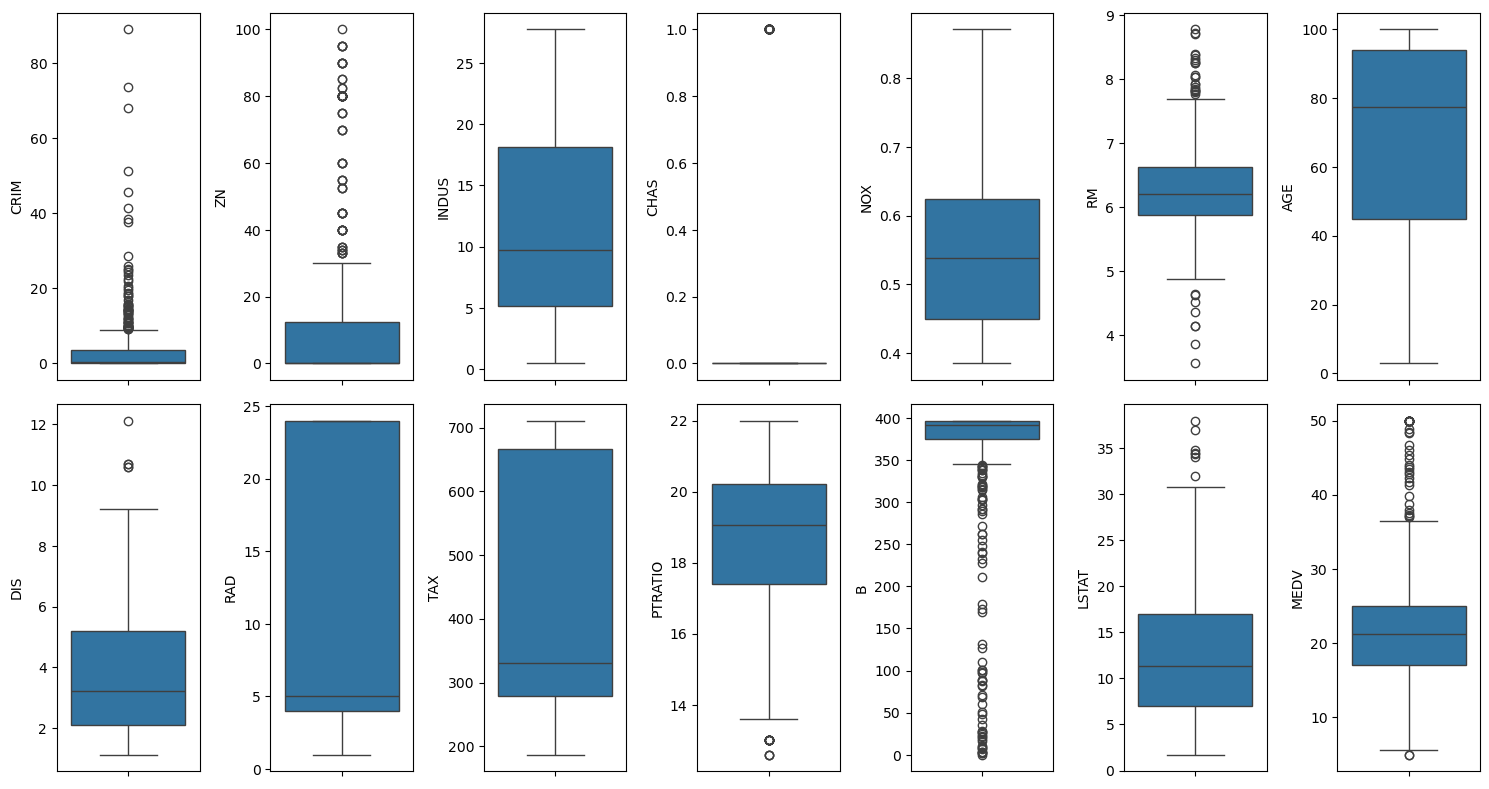

In [39]:
#prepare for plotting
fig, axes = plt.subplots(2,7,figsize = (15,8))
#convert
axes = axes.ravel()

for count ,col in enumerate(df.columns):
    ax = axes[count]
    sns.boxplot(data = df, y = col, ax = ax)
plt.tight_layout()

<h4>who let the outliers out? who who who?</h4>

In [41]:
outlier_list=[]

for count, col in enumerate(df.columns):

    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)
    IQR=Q3-Q1
    ol_dist=IQR*1.5

    outlier_list.extend(df[df[col]<Q1-ol_dist].index)
    outlier_list.extend(df[df[col]>Q3+ol_dist].index)

from collections import Counter
outlier_count=Counter(outlier_list)
outlier_count 

Counter({412: 4,
         414: 4,
         283: 4,
         367: 3,
         374: 3,
         384: 3,
         438: 3,
         195: 3,
         203: 3,
         204: 3,
         162: 3,
         163: 3,
         257: 3,
         262: 3,
         267: 3,
         371: 2,
         373: 2,
         386: 2,
         387: 2,
         398: 2,
         399: 2,
         404: 2,
         405: 2,
         406: 2,
         407: 2,
         409: 2,
         410: 2,
         411: 2,
         413: 2,
         415: 2,
         416: 2,
         417: 2,
         418: 2,
         419: 2,
         420: 2,
         422: 2,
         425: 2,
         426: 2,
         427: 2,
         429: 2,
         431: 2,
         434: 2,
         435: 2,
         436: 2,
         437: 2,
         444: 2,
         445: 2,
         454: 2,
         190: 2,
         196: 2,
         197: 2,
         198: 2,
         202: 2,
         256: 2,
         274: 2,
         276: 2,
         277: 2,
         286: 2,
         291: 

In [42]:
df.iloc[[412,414,283]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0


In [43]:
df=df.drop([412,414,283], axis =0).copy()
df=df[df['MEDV']<50].copy()
df.reset_index(inplace=True, drop=True)
df.shape

(488, 14)

In [44]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198033,0.406218,-0.062553,0.419535,-0.192058,0.349008,-0.379382,0.625573,0.581686,0.284497,-0.360665,0.438453,-0.443780
ZN,-0.198033,1.000000,-0.526465,-0.054445,-0.511645,0.309742,-0.562674,0.672988,-0.306296,-0.301438,-0.380906,0.173536,-0.425006,0.404001
INDUS,0.406218,-0.526465,1.000000,0.036953,0.764747,-0.408047,0.636261,-0.708994,0.593783,0.716232,0.385641,-0.358389,0.638071,-0.598647
CHAS,-0.062553,-0.054445,0.036953,1.000000,0.086567,0.042933,0.072552,-0.078983,-0.031254,-0.066494,-0.116177,0.039258,-0.003251,0.073891
NOX,0.419535,-0.511645,0.764747,0.086567,1.000000,-0.319126,0.727124,-0.767770,0.611302,0.666768,0.186378,-0.382231,0.616075,-0.522363
RM,-0.192058,0.309742,-0.408047,0.042933,-0.319126,1.000000,-0.260832,0.238468,-0.181737,-0.270785,-0.289225,0.088663,-0.597299,0.685988
AGE,0.349008,-0.562674,0.636261,0.072552,0.727124,-0.260832,1.000000,-0.741791,0.447954,0.496277,0.265816,-0.270693,0.638367,-0.490648
DIS,-0.379382,0.672988,-0.708994,-0.078983,-0.767770,0.238468,-0.741791,1.000000,-0.488555,-0.529141,-0.244197,0.292445,-0.535282,0.366041
RAD,0.625573,-0.306296,0.593783,-0.031254,0.611302,-0.181737,0.447954,-0.488555,1.000000,0.908066,0.453769,-0.441573,0.501796,-0.472788
TAX,0.581686,-0.301438,0.716232,-0.066494,0.666768,-0.270785,0.496277,-0.529141,0.908066,1.000000,0.449999,-0.439556,0.560932,-0.569993


<Axes: >

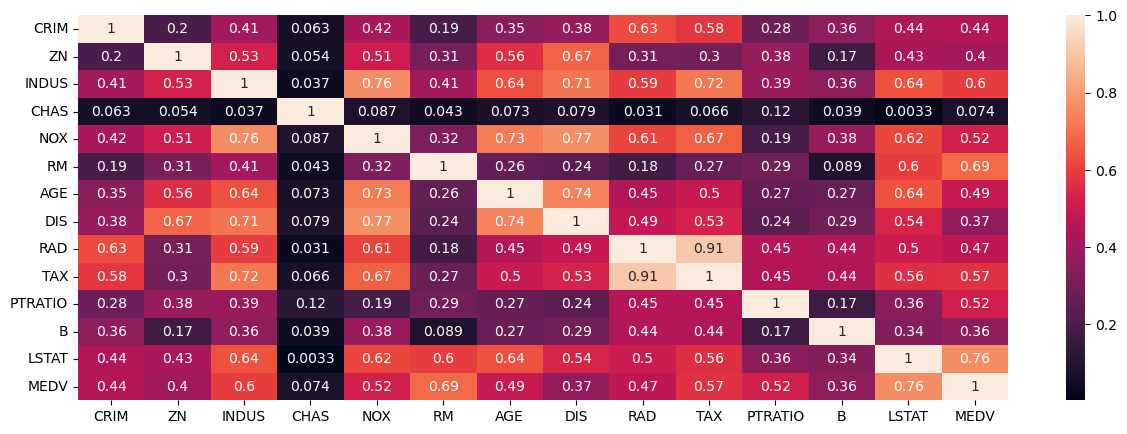

In [45]:
sns.heatmap(df.corr().abs(), annot=True)

In [46]:
columns_sels=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX']

scaler = MinMaxScaler()

features = df[columns_sels].copy()
target = df['MEDV']

In [47]:
features = pd.DataFrame(data= scaler.fit_transform(features),
                       columns=columns_sels)
features.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794


In [48]:
reg = LinearRegression()
reg .fit(features, target)
y_pred = reg.predict(features)

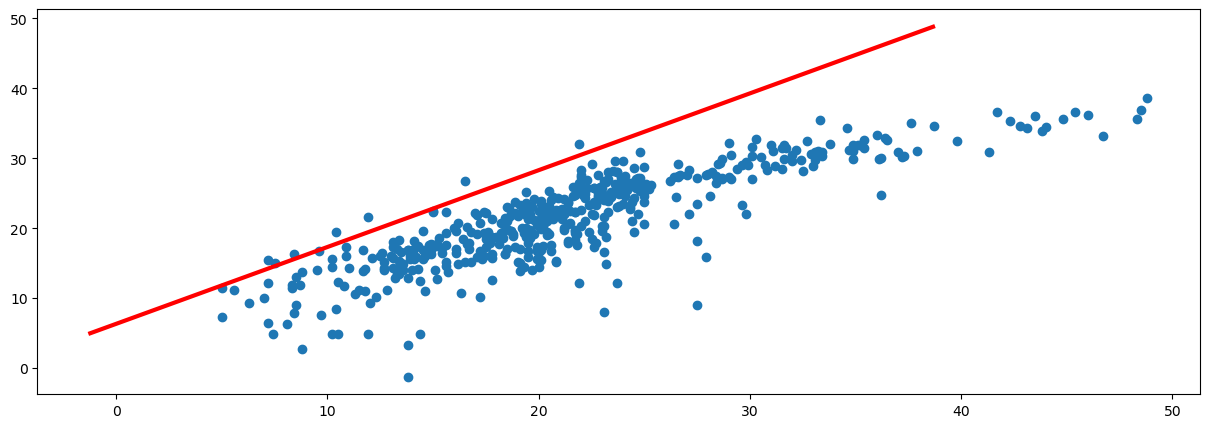

In [49]:
plt.scatter(target, y_pred)
plt.plot([y_pred.min(), y_pred.max()],
        [target.min(),target.max()],
        c='r',lw=3)


In [50]:
mean_squared_error(y_pred=y_pred,y_true=target)

16.137851951377435

In [51]:
mse = np.mean(( target- y_pred) ** 2)
mse

16.137851951377435

<H4>Day - 6</H4>
<H4>Assignmnt</H4>
##columns_sels=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX']
####change the column names and do it again


<Axes: >

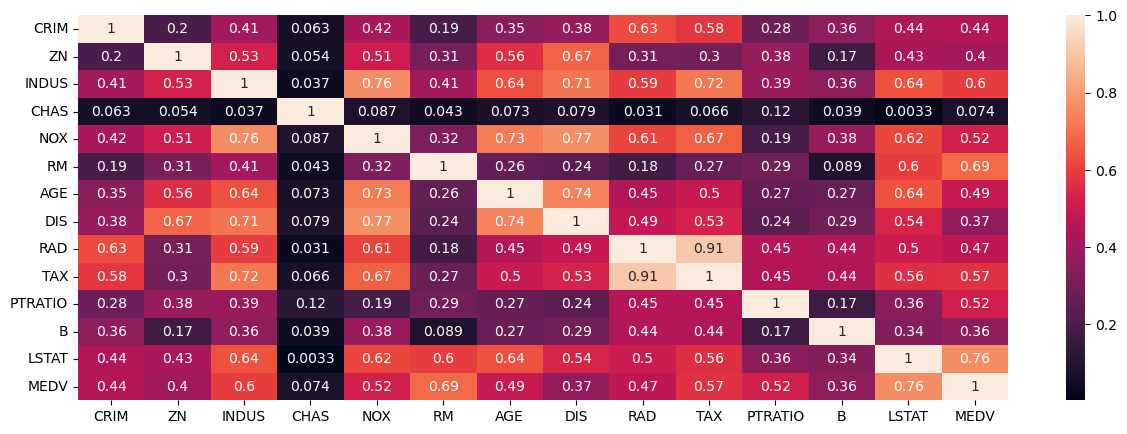

In [85]:
sns.heatmap(df.corr().abs(), annot=True)

In [376]:
columns_sels=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX', 'AGE', 'RAD', 'CRIM','ZN', 'DIS','B','CHAS']

scaler = MinMaxScaler()

features = df[columns_sels].copy()
target = df['MEDV']

In [378]:
features = pd.DataFrame(data= scaler.fit_transform(features),
                       columns=columns_sels)
features.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,AGE,RAD,CRIM,ZN,DIS,B,CHAS
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015,0.641607,0.000000,0.000000,0.18,0.268711,1.000000,0.0
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962,0.782698,0.043478,0.000236,0.00,0.348524,1.000000,0.0
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962,0.599382,0.043478,0.000236,0.00,0.348524,0.989737,0.0
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794,0.441813,0.086957,0.000293,0.00,0.448173,0.994276,0.0
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794,0.528321,0.086957,0.000705,0.00,0.448173,1.000000,0.0


In [380]:
reg = LinearRegression()
reg .fit(features, target)
y_pred = reg.predict(features)

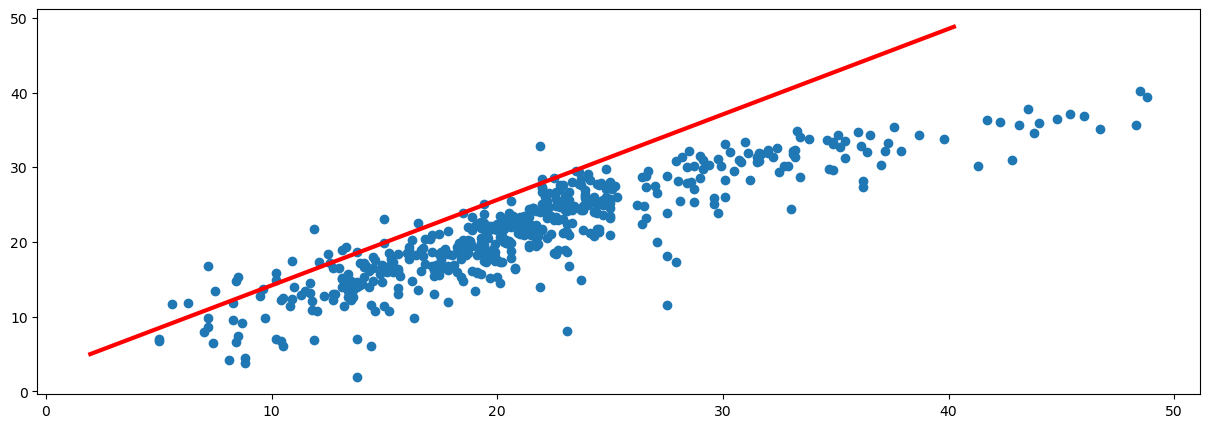

In [382]:
plt.scatter(target, y_pred)
plt.plot([y_pred.min(), y_pred.max()],
        [target.min(),target.max()],
        c='r',lw=3)

In [384]:
mean_squared_error(y_pred=y_pred,y_true=target)

13.122437108501273

In [386]:
mse = np.mean((target - y_pred) ** 2)
mse

13.122437108501273

In [388]:
df[['TAX', 'NOX']].corr()

,TAX,NOX
TAX,1.000000,0.666768
NOX,0.666768,1.000000


<Axes: >

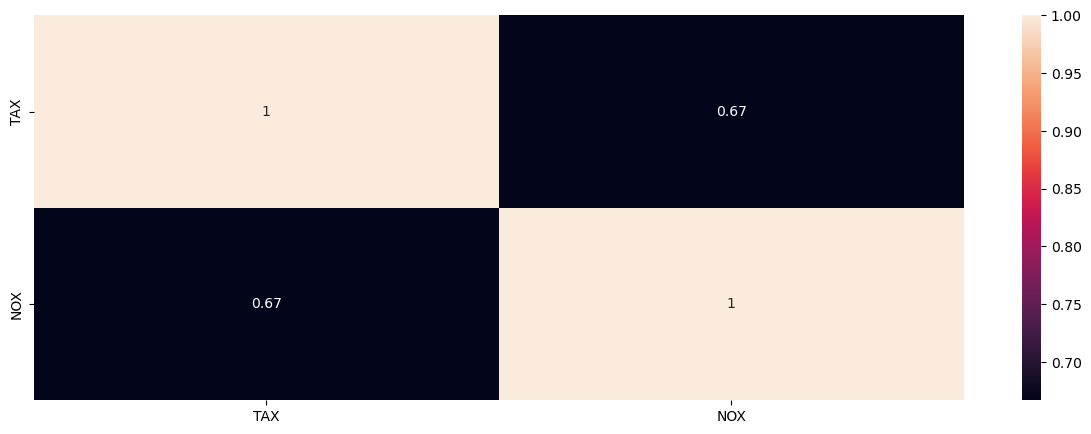

In [390]:
sns.heatmap(df[['TAX', 'NOX']].corr(), annot = True)

In [421]:
columns_sels=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX']

scaler = MinMaxScaler()

features = df[columns_sels].copy()
target = df['MEDV']

In [423]:
features = pd.DataFrame(data= scaler.fit_transform(features),
                       columns=columns_sels)
features.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794


In [428]:
reg = LinearRegression()
reg .fit(features, target)
y_pred = reg.predict(features)

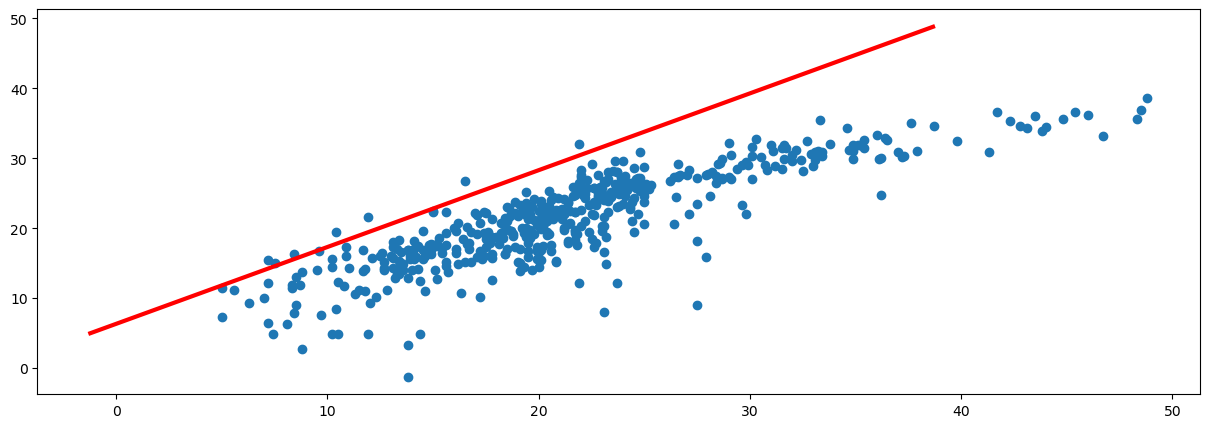

In [431]:
plt.scatter(target, y_pred)
plt.plot([y_pred.min(), y_pred.max()],
        [target.min(),target.max()],
        c='r',lw=3)

In [433]:
mean_squared_error(y_pred=y_pred,y_true=target)

16.137851951377435

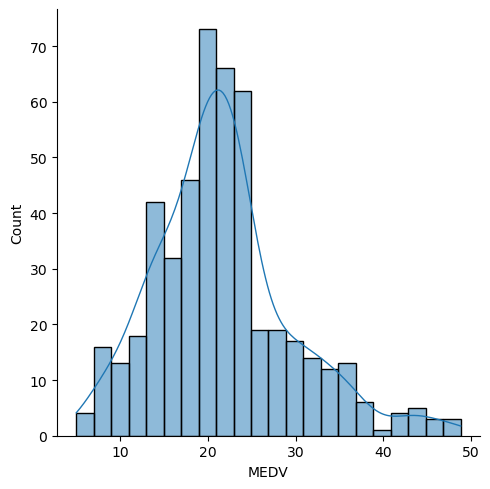

In [438]:
sns.displot(data = df ,  x = 'MEDV', kde = True)

In [442]:
y= np.log1p(df['MEDV'])
df['log_val'] = y

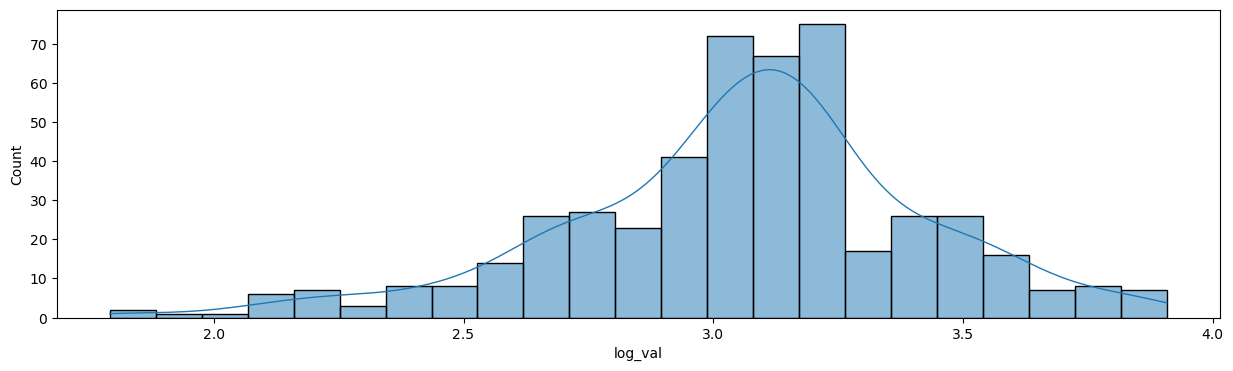

In [448]:
fig , ax = plt.subplots(figsize = (15,4))
sns.histplot(data= df, x= 'log_val', kde =True, ax =ax);

<h4>Logistic Regression</h4>
<H3>Case - 1 Binary Classification</H3>

In [459]:
X , y = datasets.make_moons(  n_samples=N_SAMPLES,
                                noise=NOISE,
                                random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.79254123,  0.81852609],
        [-0.86341583,  0.77353281],
        [ 1.94098477,  0.40538635],
        [-0.96149236,  0.06064943],
        [-0.98373033,  0.05715389]]),
 array([0, 0, 1, 0, 0], dtype=int64))

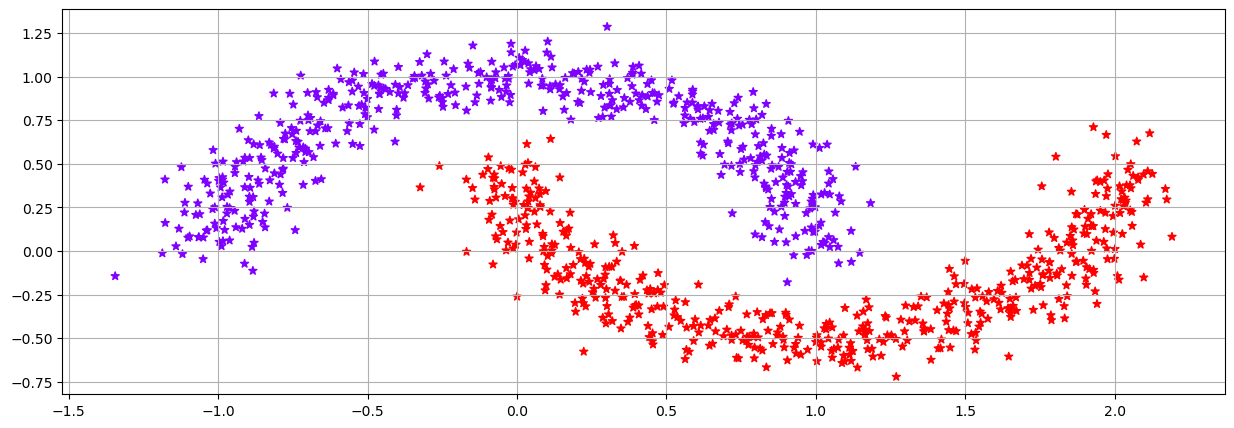

In [477]:
plt.scatter(X[:,0], X[:,1], marker= '*', c =y, cmap=  CMAP)
plt.grid(True)

In [481]:
clf = LogisticRegression(penalty= None,
                         random_state= RANDOM_STATE)
clf.fit(X,y)
y_pred =clf.predict(X)

In [483]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [485]:
clf.predict_proba(X[:2, :])

array([[0.95143545, 0.04856455],
       [0.99034282, 0.00965718]])

In [487]:
y_pred[:2]

array([0, 0], dtype=int64)

Decision Boundry

In [582]:
def fn_plot_decision_boundry(X1, y, clf):
    '''
    Args : 
        X1: np.ndarray - Feature matrix
        y: np.ndarray - lables/target
        clf: classifier
    '''
    
    fig , ax = plt.subplots(figsize =(15,6))
    dm = 0.01

    x_min, x_max =X1[:,0].min()-0.5,X1[:,0].max()+0.5 #col1
    y_min, y_max =X1[:,1].min()-0.5,X1[:,1].max()+0.5 #col2 

    #Create a meshgrid
    xx, yy= np.meshgrid(np.arange(x_min, x_max, dm),
                   np.arange(y_min, y_max, dm))
    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    #make predication 
    y_pred = clf.predict(XX)

    # Assign predication to the respect pont
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha = 0.6, cmap = plt.cm.Paired)

    ax.scatter(X1[:, 0],X1[:, 1], c = y, s = 20,
              edgecolor = 'k', cmap = CMAP)
    return 

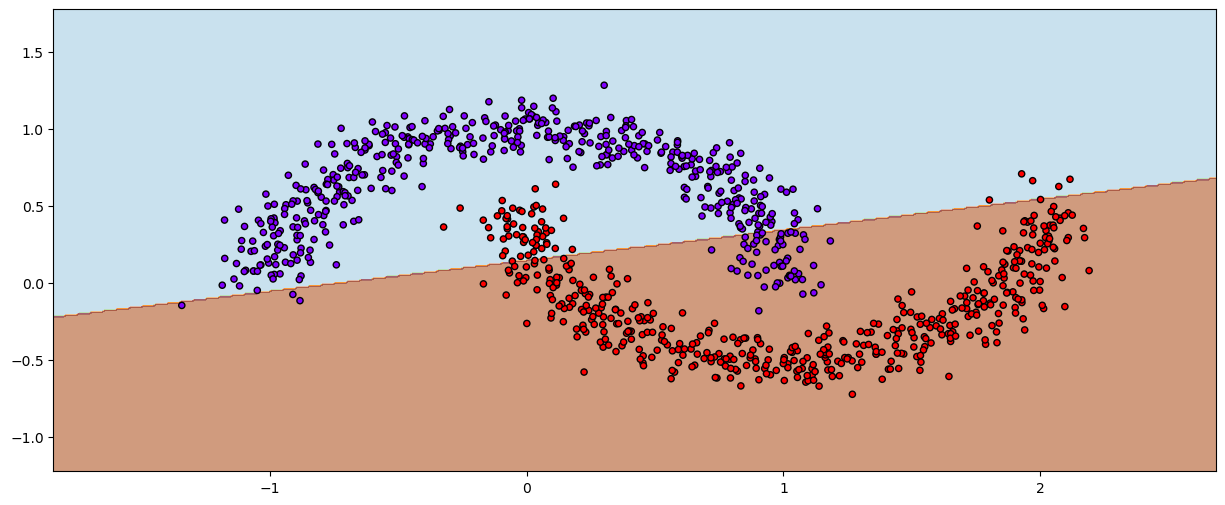

In [584]:
 fn_plot_decision_boundry(X, y, clf)

In [576]:
xx, yy = xx.ravel(), yy.ravel()
xx.shape,yy.shape

((136654,), (136654,))

In [534]:
plt.figure(figsize=(100, 100))
plt.scatter(xx, yy, marker='+')